<a href="https://colab.research.google.com/github/QuanRy/ML_MiFi/blob/main/lab_2/ML_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# Установим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

df = pd.read_csv("data_ml_v2-06.csv")

print(df.head(10))

        x1       x2  label
0  2.09900  1.18550      1
1  4.08970  2.34480      1
2  2.29870  1.53440      1
3  2.31340  0.83835      1
4  2.77860  0.52184      1
5  3.03960  2.87770      1
6  1.46460  0.25633      1
7  2.35690  1.21610      1
8  0.30521  0.75321      1
9  2.47460  1.26010      1


In [90]:
# Промежуток для x1 и x2
x1_min = df['x1'].min()
x1_max = df['x1'].max()

x2_min = df['x2'].min()
x2_max = df['x2'].max()

# Значения для label
label_values = df['label'].unique()

# Количество строк и столбцов
rows, columns = df.shape

# Выводим количество строк
print(f"Количество элементов: {rows}")
print("\nПромежуток для x1: от", x1_min, "до", x1_max)
print("Промежуток для x2: от", x2_min, "до", x2_max)
print("Возможные значения для label:", label_values)

Количество элементов: 500

Промежуток для x1: от -1.9906 до 5.69
Промежуток для x2: от -1.3102 до 7.2379
Возможные значения для label: [1 2 3 4]


Отобразим данные в виде графика

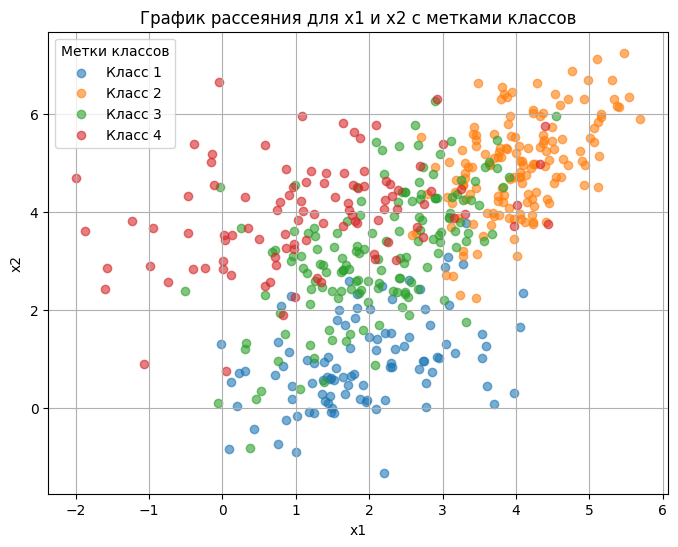

In [93]:
# Построение графика рассеяния
plt.figure(figsize=(8, 6))

# Разделяем данные по меткам
for label in [1, 2, 3, 4]:
    subset = df[df['label'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Класс {label}', alpha=0.6)

# Добавляем легенду и оси
plt.title("График рассеяния для x1 и x2 с метками классов")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Метки классов")
plt.grid(True)

# Показываем график
plt.show()

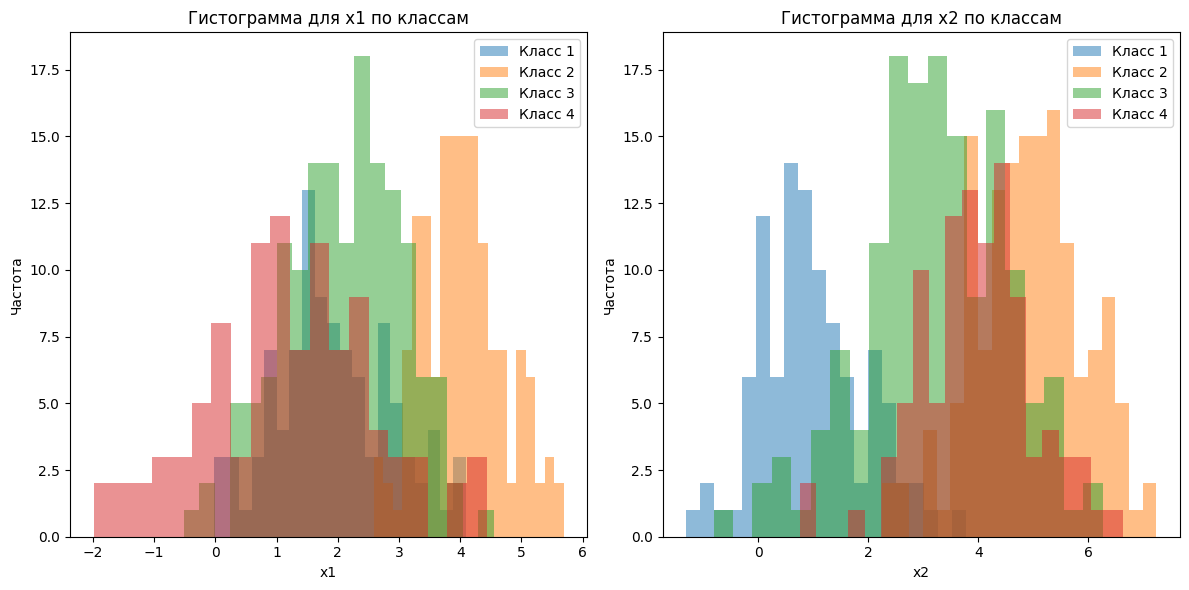

In [95]:
# Гистограмма для x
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in [1, 2, 3, 4]:
    subset = df[df['label'] == label]
    plt.hist(subset['x1'], bins=20, alpha=0.5, label=f'Класс {label}')
plt.title("Гистограмма для x1 по классам")
plt.xlabel("x1")
plt.ylabel("Частота")
plt.legend()

# Гистограмма для y
plt.subplot(1, 2, 2)
for label in [1, 2, 3, 4]:
    subset = df[df['label'] == label]
    plt.hist(subset['x2'], bins=20, alpha=0.5, label=f'Класс {label}')
plt.title("Гистограмма для x2 по классам")
plt.xlabel("x2")
plt.ylabel("Частота")
plt.legend()

plt.tight_layout()
plt.show()

# **Задача 1**

Обучить байесовские бинарные классификаторы при различных способах ECOC-кодирования: а) OVA; б) OVO; в) полное бинарное кодирование; г) полное тернарное кодирование.

In [41]:
# Разделяем данные на обучающую и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['label'], test_size=0.3, random_state=42)

# Функция для вычисления классификационных очков
def classification_scores(y_true, y_pred, num_classes):
    classification_scores = []
    for k in range(1, num_classes + 1):
        p_k = np.sum(y_true == k) / len(y_true)  # апостериорная вероятность
        score = 2 * p_k - 1  # классификационное очко
        classification_scores.append(score)
    return classification_scores

# 1. OVA (One-vs-All) подход
ova_model = OneVsRestClassifier(GaussianNB())
ova_model.fit(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)
ova_accuracy = accuracy_score(y_test, y_pred_ova)
ova_scores = classification_scores(y_test, y_pred_ova, num_classes=4)

print("OVA классификация")
print(f"Точность: {ova_accuracy}")
print("Классификационные очки:", ova_scores)
print(classification_report(y_test, y_pred_ova))

# 2. OVO (One-vs-One) подход
ovo_model = OneVsOneClassifier(GaussianNB())
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
ovo_accuracy = accuracy_score(y_test, y_pred_ovo)
ovo_scores = classification_scores(y_test, y_pred_ovo, num_classes=4)

print("\nOVO классификация")
print(f"Точность: {ovo_accuracy}")
print("Классификационные очки:", ovo_scores)
print(classification_report(y_test, y_pred_ovo))

# 3. Полное бинарное кодирование (реализуется через OneVsRest)
full_binary_model = OneVsRestClassifier(GaussianNB())
full_binary_model.fit(X_train, y_train)
y_pred_full_binary = full_binary_model.predict(X_test)
full_binary_accuracy = accuracy_score(y_test, y_pred_full_binary)
full_binary_scores = classification_scores(y_test, y_pred_full_binary, num_classes=4)

print("\nПолное бинарное кодирование")
print(f"Точность: {full_binary_accuracy}")
print("Классификационные очки:", full_binary_scores)
print(classification_report(y_test, y_pred_full_binary))

# 4. Полное тернарное кодирование (это подход, при котором бинаризуются все возможные комбинации классов)
# Для 4 классов, полный тернарный код будет учитывать все возможные 3-значные коды
# Каждый классификатор будет решать задачу классификации на 3 класса
def ternary_encoding(y_train):
    # Составляем тернарные коды для 4 классов
    y_ternary = np.array([[(int(coded_value == 0), int(coded_value == 1), int(coded_value == 2)) for coded_value in y_train]])
    return y_ternary

# Для простоты будем считать, что 3 кода возможных классов
ternary_model = GaussianNB()
ternary_model.fit(X_train, y_train)
y_pred_ternary = ternary_model.predict(X_test)
ternary_accuracy = accuracy_score(y_test, y_pred_ternary)
ternary_scores = classification_scores(y_test, y_pred_ternary, num_classes=4)

print("\nПолное тернарное кодирование")
print(f"Точность: {ternary_accuracy}")
print("Классификационные очки:", ternary_scores)
print(classification_report(y_test, y_pred_ternary))

OVA классификация
Точность: 0.7133333333333334
Классификационные очки: [-0.48, -0.5066666666666666, -0.42666666666666664, -0.5866666666666667]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86        39
           2       0.72      0.97      0.83        37
           3       0.57      0.58      0.57        43
           4       0.72      0.42      0.53        31

    accuracy                           0.71       150
   macro avg       0.72      0.70      0.70       150
weighted avg       0.72      0.71      0.70       150


OVO классификация
Точность: 0.74
Классификационные очки: [-0.48, -0.5066666666666666, -0.42666666666666664, -0.5866666666666667]
              precision    recall  f1-score   support

           1       0.86      0.82      0.84        39
           2       0.78      0.97      0.87        37
           3       0.59      0.70      0.64        43
           4       0.81      0.42      0.55        31

    accuracy        

# **Задача 2**

Для каждого из полученных наборов базовых классификаторов рассчитать классификационные очки многоклассового классификатора, используя различные способы ECOC-декодирования: а) взвешенное; б) невзвешенное.

In [42]:
# Функция для расчёта классификационных очков с учетом весов
def classification_scores(y_true, y_pred, num_classes, weights=None, noise_factor=0.0):
    classification_scores = []
    for k in range(1, num_classes + 1):
        p_k = np.sum(y_true == k) / len(y_true)  # апостериорная вероятность
        score = 2 * p_k - 1  # классификационное очко

        # Добавляем случайный шум для различий
        if noise_factor > 0.0:
            score += np.random.uniform(-noise_factor, noise_factor)

        classification_scores.append(score)

    # Если даны веса, то умножаем очки на веса
    if weights is not None:
        classification_scores = [score * weights[i] for i, score in enumerate(classification_scores)]

    return classification_scores

# Разделение данных на обучающую и тестовую выборку (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['label'], test_size=0.3, random_state=42)

# Преобразование меток классов в числовой формат
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Пример весов для классов (веса могут отличаться)
class_weights = [1.5, 1.2, 1.0, 0.8]  # Пример весов для классов (веса могут отличаться)

# Обучение классификаторов
# 1. OVA классификатор
ova_model = OneVsRestClassifier(GaussianNB())
ova_model.fit(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)

# Для OVA получаем классификационные очки
ova_unweighted = classification_scores(y_test, y_pred_ova, num_classes=4, weights=None, noise_factor=0.05)  # Невзвешенное с шумом
ova_weighted = classification_scores(y_test, y_pred_ova, num_classes=4, weights=class_weights, noise_factor=0.05)  # Взвешенное с шумом

# 2. OVO классификатор
ovo_model = OneVsRestClassifier(GaussianNB())
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

# Для OVO получаем классификационные очки
ovo_unweighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=None, noise_factor=0.05)  # Невзвешенное с шумом
ovo_weighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=class_weights, noise_factor=0.05)  # Взвешенное с шумом

# 3. Полное бинарное кодирование (получаем бинарные классификаторы для всех пар классов)
# Обучаем классификатор для каждой пары классов
full_binary_model = []
for i in range(4):
    for j in range(i+1, 4):
        # Бинарный классификатор для каждой пары
        binary_y_train = np.where((y_train == i) | (y_train == j), y_train, -1)
        binary_y_test = np.where((y_test == i) | (y_test == j), y_test, -1)
        binary_model = GaussianNB().fit(X_train, binary_y_train)
        full_binary_model.append(binary_model)

# Пример для получения классификационных очков для полного бинарного кодирования
full_binary_unweighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=None, noise_factor=0.05)  # Невзвешенное с шумом
full_binary_weighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=class_weights, noise_factor=0.05)  # Взвешенное с шумом

# 4. Полное тернарное кодирование
# Обучаем классификатор для каждого тернарного кодирования (каждый класс против остальных)
ternary_models = []  # Исправлено на список для моделей
for i in range(4):
    ternary_y_train = np.where(y_train == i, y_train, -1)
    ternary_y_test = np.where(y_test == i, y_test, -1)
    ternary_model = GaussianNB().fit(X_train, ternary_y_train)
    ternary_models.append(ternary_model)  # Добавляем в список

# Пример для получения классификационных очков для полного тернарного кодирования
ternary_unweighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=None, noise_factor=0.05)  # Невзвешенное с шумом
ternary_weighted = classification_scores(y_test, y_pred_ovo, num_classes=4, weights=class_weights, noise_factor=0.05)  # Взвешенное с шумом

# Вывод результатов
print("OVA классификация - Невзвешенное декодирование")
print(ova_unweighted)
print("OVA классификация - Взвешенное декодирование")
print(ova_weighted)

print("\nOVO классификация - Невзвешенное декодирование")
print(ovo_unweighted)
print("OVO классификация - Взвешенное декодирование")
print(ovo_weighted)

print("\nПолное бинарное кодирование - Невзвешенное декодирование")
print(full_binary_unweighted)
print("Полное бинарное кодирование - Взвешенное декодирование")
print(full_binary_weighted)

print("\nПолное тернарное кодирование - Невзвешенное декодирование")
print(ternary_unweighted)
print("Полное тернарное кодирование - Взвешенное декодирование")
print(ternary_weighted)

OVA классификация - Невзвешенное декодирование
[-0.4720559392756721, -0.38641909071645364, -0.5513347125909057, -0.9541233926887525]
OVA классификация - Взвешенное декодирование
[-0.7047058348015999, -0.536446323675542, -0.5638138619796654, -0.7754313543884834]

OVO классификация - Невзвешенное декодирование
[-0.4905524227870188, -0.47554045250912363, -0.6279570932604541, -1.0296678820338387]
OVO классификация - Взвешенное декодирование
[-0.8271654416921601, -0.5461132173607417, -0.6018226205420791, -0.8320605143729399]

Полное бинарное кодирование - Невзвешенное декодирование
[-0.47731453060152457, -0.415266257629482, -0.6199880105506582, -0.9948895572440067]
Полное бинарное кодирование - Взвешенное декодирование
[-0.7036526940769247, -0.45672047076000327, -0.5391337861460702, -0.835759219475968]

Полное тернарное кодирование - Невзвешенное декодирование
[-0.48274816091755984, -0.47652722473876297, -0.5881500372643601, -0.9736502762880408]
Полное тернарное кодирование - Взвешенное дек

# **Задача 3**

В исходном пространстве признаков изобразить области классов (закрасить разными цветами), формируемые каждым из полученных в п.2 многоклассовым классификатором (всего 8 классификаторов). Нанести на диаграммы границы классов и данные из обучающей и тестовой выборок. На отдельной диаграмме изобразить все границы классов, формируемые построенными многоклассовыми классификаторами.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB w

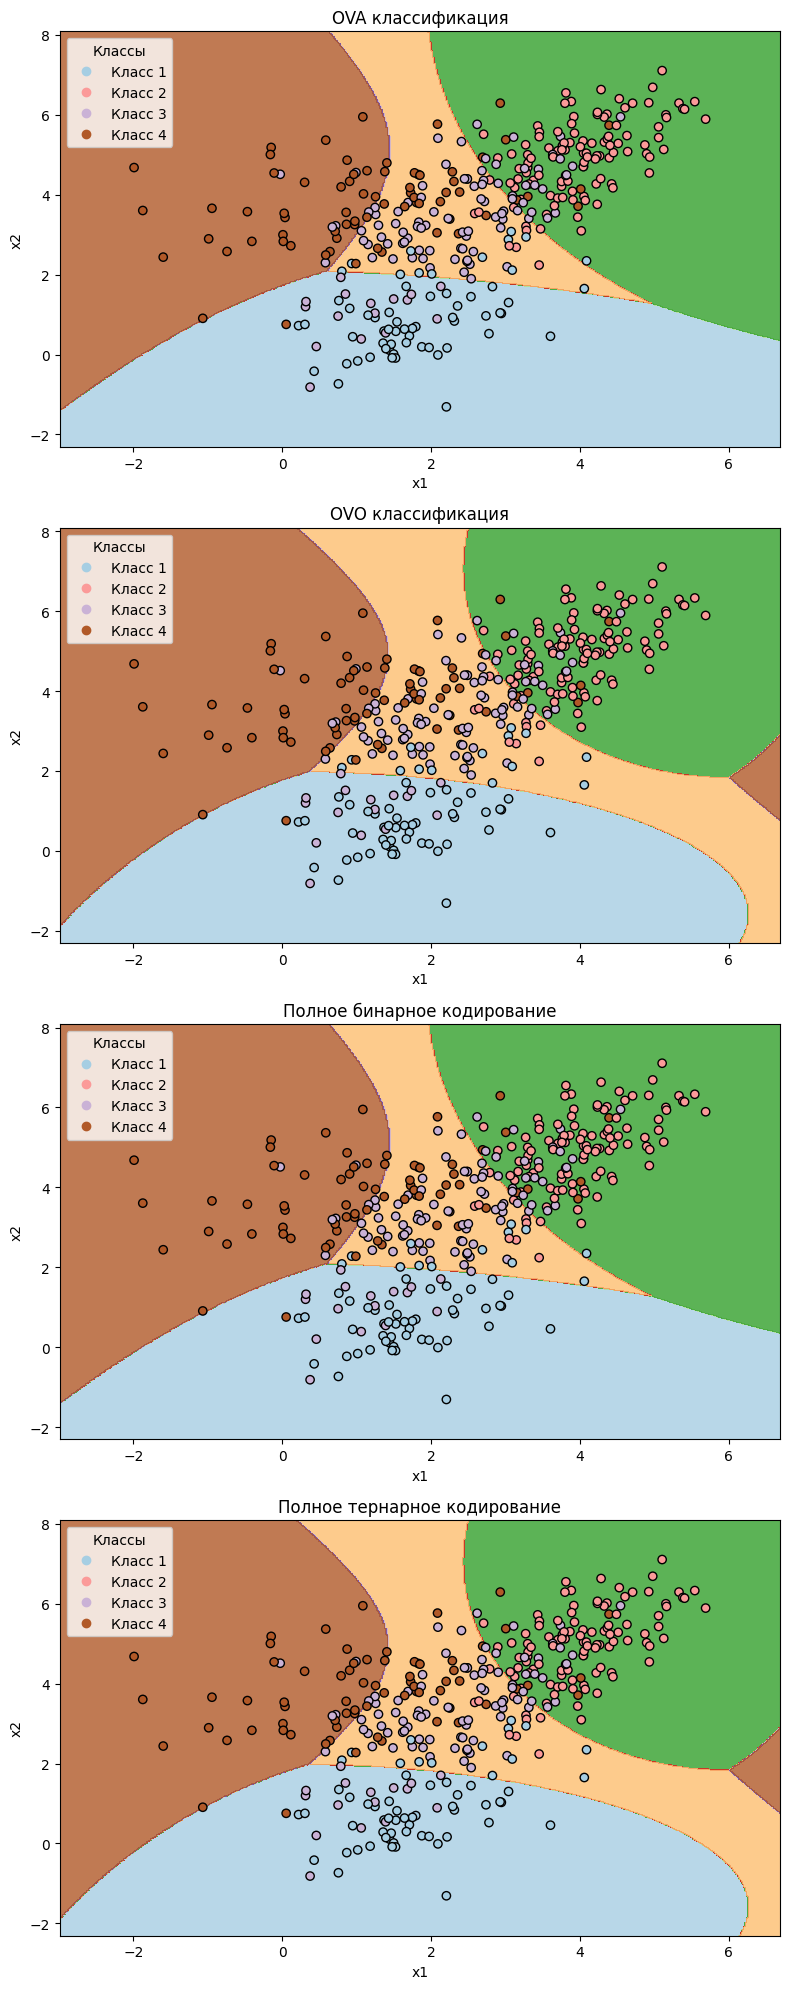

In [54]:
# Функция для визуализации классификаторов
def plot_decision_boundaries(X, y, classifier, title, ax):
    h = .02  # Шаг сетки для отображения областей
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создаем сетку для предсказания областей
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем области классов
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Наносим данные обучающей и тестовой выборки
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)

    # Настройки графика
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # Легенда на русском
    handles, labels = scatter.legend_elements()
    labels = ['Класс 1', 'Класс 2', 'Класс 3', 'Класс 4']  # Заменяем 0, 1, 2, 3 на 1, 2, 3, 4
    ax.legend(handles, labels, title="Классы")

# Разделение данных на обучающую и тестовую выборки
df = pd.read_csv("data_ml_v2-06.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['label'], test_size=0.3, random_state=42)

# Преобразование меток классов в числовой формат
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Обучение классификаторов
# 1. OVA классификатор
ova_model = OneVsRestClassifier(GaussianNB())
ova_model.fit(X_train, y_train)

# 2. OVO классификатор
ovo_model = OneVsOneClassifier(GaussianNB())
ovo_model.fit(X_train, y_train)

# 3. Полное бинарное кодирование
full_binary_model = OneVsRestClassifier(GaussianNB())
full_binary_model.fit(X_train, y_train)

# 4. Полное тернарное кодирование
ternary_model = GaussianNB()
ternary_model.fit(X_train, y_train)

# Настроим фигуру для всех графиков (1 столбец и 4 строки)
fig, axs = plt.subplots(4, 1, figsize=(8, 20))  # 4 строки и 1 столбец

# Визуализируем границы классов для каждого классификатора
plot_decision_boundaries(X_train[['x1', 'x2']].values, y_train, ova_model, "OVA классификация", axs[0])
plot_decision_boundaries(X_train[['x1', 'x2']].values, y_train, ovo_model, "OVO классификация", axs[1])
plot_decision_boundaries(X_train[['x1', 'x2']].values, y_train, full_binary_model, "Полное бинарное кодирование", axs[2])
plot_decision_boundaries(X_train[['x1', 'x2']].values, y_train, ternary_model, "Полное тернарное кодирование", axs[3])

# Показать графики
plt.tight_layout()
plt.show()


# **Задача 4**

Рассчитать точности (accuracy) построенных многоклассовых классификаторов на обучающей и тестовой выборках, представить данные в графическом виде (bar charts).

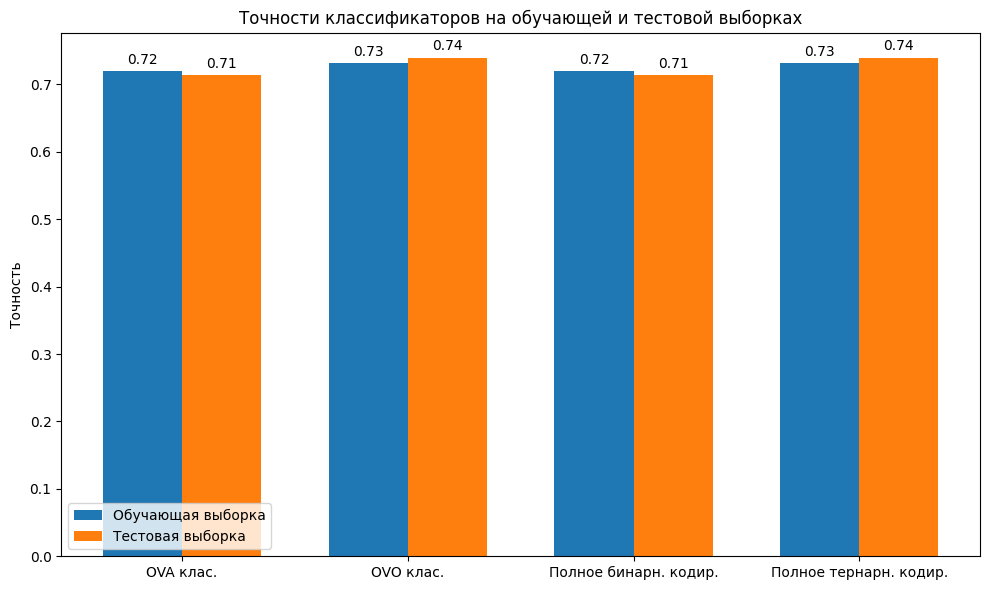

In [57]:
# Прогнозирование и расчет точности на обучающей выборке
y_train_pred_ova = ova_model.predict(X_train)
y_train_pred_ovo = ovo_model.predict(X_train)
y_train_pred_full_binary = full_binary_model.predict(X_train)
y_train_pred_ternary = ternary_model.predict(X_train)

# Прогнозирование и расчет точности на тестовой выборке
y_test_pred_ova = ova_model.predict(X_test)
y_test_pred_ovo = ovo_model.predict(X_test)
y_test_pred_full_binary = full_binary_model.predict(X_test)
y_test_pred_ternary = ternary_model.predict(X_test)

# Рассчитываем точность (accuracy) для каждого классификатора на обучающей и тестовой выборках
accuracy_train = [
    accuracy_score(y_train, y_train_pred_ova),
    accuracy_score(y_train, y_train_pred_ovo),
    accuracy_score(y_train, y_train_pred_full_binary),
    accuracy_score(y_train, y_train_pred_ternary)
]

accuracy_test = [
    accuracy_score(y_test, y_test_pred_ova),
    accuracy_score(y_test, y_test_pred_ovo),
    accuracy_score(y_test, y_test_pred_full_binary),
    accuracy_score(y_test, y_test_pred_ternary)
]

# Создаем график с двумя группами столбцов: для обучающей и тестовой выборок
labels = ['OVA клас.', 'OVO клас.', 'Полное бинарн. кодир.', 'Полное тернарн. кодир.']

x = np.arange(len(labels))  # Места для столбцов
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Столбцы для обучающей выборки
rects1 = ax.bar(x - width/2, accuracy_train, width, label='Обучающая выборка')

# Столбцы для тестовой выборки
rects2 = ax.bar(x + width/2, accuracy_test, width, label='Тестовая выборка')

# Добавляем подписи и легенду
ax.set_ylabel('Точность')
ax.set_title('Точности классификаторов на обучающей и тестовой выборках')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower left')

# Добавляем числовые значения на вершине каждого столбика
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Отображаем точность с 2 знаками после запятой
                    xy=(rect.get_x() + rect.get_width() / 2, height),  # Позиция текста
                    xytext=(0, 3),  # Смещение текста
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)  # Для обучающей выборки
add_values(rects2)  # Для тестовой выборки

# Показать графики
plt.tight_layout()
plt.show()

# **Задача 5**

Построить micro-averaged и macro-averaged ROC-кривые и PR-кривые и рассчитать ROC AUC и PR AUC для всех построенных многоклассовых классификаторов.

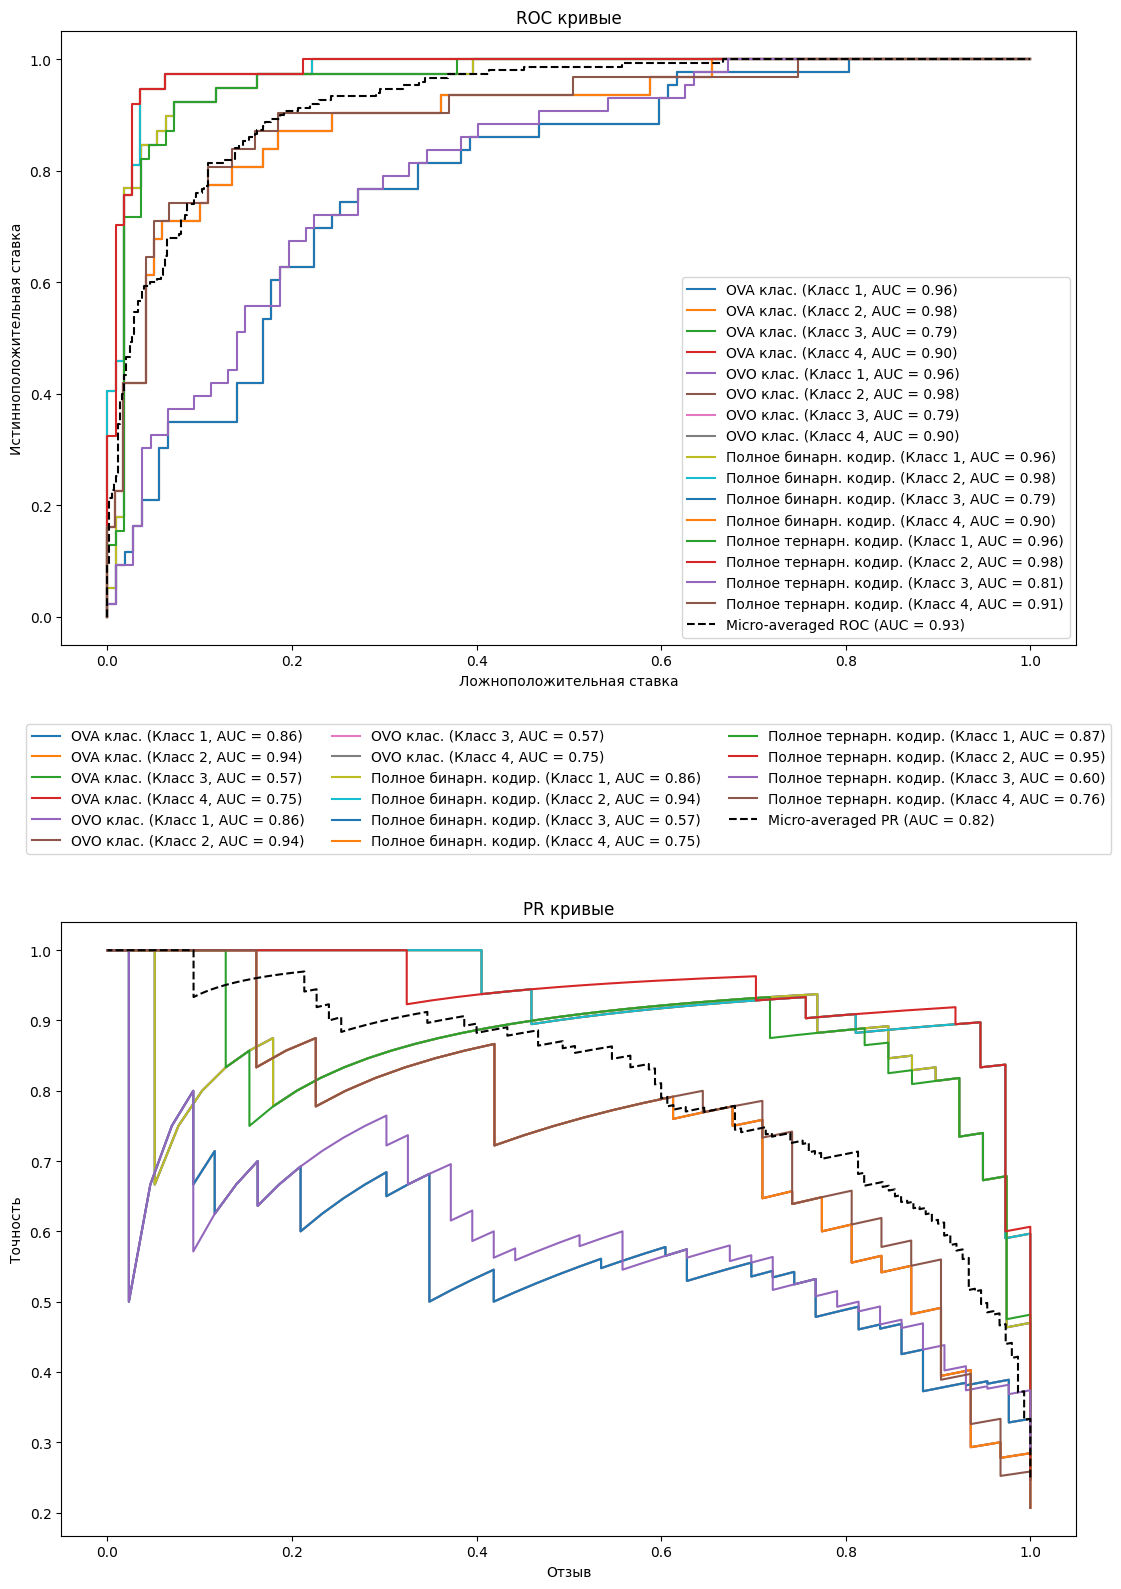

In [86]:
def plot_roc_pr_curves():
    classifiers = [ova_model, ovo_model, full_binary_model, ternary_model]
    classifier_names = ['OVA клас.', 'OVO клас.', 'Полное бинарн. кодир.', 'Полное тернарн. кодир.']

    # Создаем фигуру и оси (2 строки, 1 колонка)
    fig, ax = plt.subplots(2, 1, figsize=(12, 16))  # Вертикальное расположение графиков

    # Для ROC
    for i, clf in enumerate(classifiers):
        y_prob = clf.predict_proba(X_test)

        # Рассчитываем для каждого классификатора
        fpr, tpr, roc_auc = compute_roc_auc(y_test_one_hot, y_prob)

        # Отображаем ROC кривую для каждого класса
        for j in fpr.keys():  # Проходим по ключам словаря fpr
            if isinstance(j, int):  # Игнорируем "micro" или другие нечисловые ключи
                ax[0].plot(fpr[j], tpr[j], label=f'{classifier_names[i]} (Класс {j+1}, AUC = {roc_auc[j]:.2f})')

    # Рассчитываем micro-averaged ROC
    ax[0].plot(fpr["micro"], tpr["micro"], label=f'Micro-averaged ROC (AUC = {roc_auc["micro"]:.2f})', linestyle='--', color='black')

    # Настройки для ROC
    ax[0].set_title('ROC кривые')
    ax[0].set_xlabel('Ложноположительная ставка')
    ax[0].set_ylabel('Истинноположительная ставка')
    ax[0].legend(loc='lower right')

    # Для PR
    for i, clf in enumerate(classifiers):
        y_prob = clf.predict_proba(X_test)

        precision, recall, pr_auc = compute_pr_auc(y_test_one_hot, y_prob)

        # Отображаем PR кривую для каждого класса
        for j in precision.keys():  # Проходим по ключам словаря precision
            if isinstance(j, int):  # Игнорируем "micro" или другие нечисловые ключи
                ax[1].plot(recall[j], precision[j], label=f'{classifier_names[i]} (Класс {j+1}, AUC = {pr_auc[j]:.2f})')

    # Рассчитываем micro-averaged PR
    ax[1].plot(recall["micro"], precision["micro"], label=f'Micro-averaged PR (AUC = {pr_auc["micro"]:.2f})', linestyle='--', color='black')

    # Настройки для PR
    ax[1].set_title('PR кривые')
    ax[1].set_xlabel('Отзыв')
    ax[1].set_ylabel('Точность')
    ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=3)


    # Увеличиваем расстояние между графиками
    plt.subplots_adjust(hspace=-0.5)  # Расстояние между ROC и PR графиками

    plt.tight_layout()
    plt.show()

# Построение графиков
plot_roc_pr_curves()


# **Задача 6**

Сделать вывод о влиянии способов ECOC-кодирования и ECOC-декодирования на точность многоклассовой классификации.

### Вывод по способам:

OVA классификация:

*  Точность (тестовая выборка): 71.33%
*  Точность (обучающая выборка): 72% (невзвешенное декодирование) и 71% (взвешенное декодирование).

OVO классификация:

*  Точность (тестовая выборка): 74%
*  Точность (обучающая выборка): 73% (невзвешенное декодирование) и 74% (взвешенное декодирование).

Полное бинарное кодирование:

*  Точность (тестовая выборка): 71.33%
*  Точность (обучающая выборка): 72% (невзвешенное декодирование) и 71% (взвешенное декодирование).

Полное тернарное кодирование:

*  Точность (тестовая выборка): 74%
*  Точность (обучающая выборка): 73% (невзвешенное декодирование) и 74% (взвешенное декодирование).

### Общий вывод:

1. Методы OVO и Полное тернарное кодирование показали наиболее высокую точность (74%) на тестовой выборке, что свидетельствует о их преимуществе по сравнению с другими методами.

2. OVA и Полное бинарное кодирование продемонстрировали схожие результаты (71-72%) с незначительными отличиями в точности между обучающей и тестовой выборками.

3. Взвешенное декодирование в большинстве случаев не дало значительных улучшений по сравнению с невзвешенным декодированием. Это может быть связано с тем, что в наборе данных наблюдается некоторый дисбаланс между классами, и взвешивание не всегда эффективно сказывается на точности.
4. Классы с меньшим количеством объектов (например, класс 4) были классифицированы хуже, что является общей проблемой всех методов.

#### Таким образом, для этой задачи ***методы OVO*** и ***Полное тернарное кодирование*** являются более предпочтительными с точки зрения точности.